# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv('winequality.csv')
pd.options.display.max_rows = 4000
data.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097  

In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#To check for missing values in our dataset
data.isna().sum()
#There is no missing value found after running the cell

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

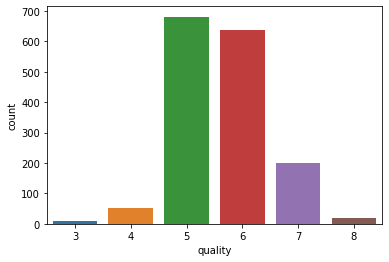

In [83]:
# Our label Distribution (countplot)
sns.countplot(x="quality", data=data)
plt.show()

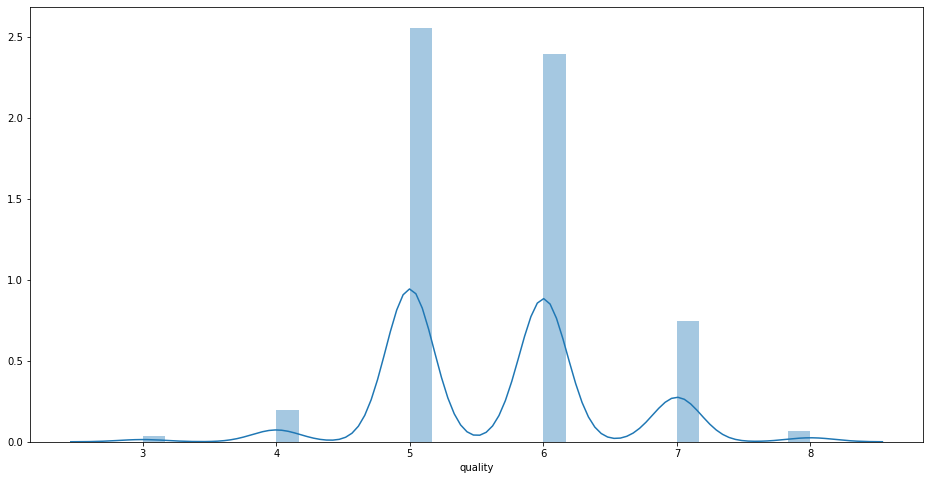

In [84]:
# Example EDA (distplot)
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(data.quality);
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [79]:
duplicates=data.duplicated()
print(sum(duplicates))

240


In [80]:
#I'm adding one more feature in order to define the quality of wine as
#good wine or bad wine. If it has a quality of 5 to 8, its good wine but
#if it has a quality lesser than 5, its bad wine.
data["good_quality"]= [1 if x>=5 else 0 for x in data["quality"]]
X = data.drop(["quality", "good_quality"], axis = 1)
y= data["good_quality"]

In [81]:
#To know the value of good wine versus bad wine
difference = data["good_quality"].value_counts()
print(difference)
#after running the cell, the number of good quality wine is higher than 
#bad quality wine. And I assume that resampling isn't  needed.

1    1536
0      63
Name: good_quality, dtype: int64


In [71]:
#Normalize feature variaables
from sklearn.preprocessing import StandardScaler
X_features = X
X= StandardScaler().fit_transform(X)

In [72]:
#Splitting the data into training and test set so i could cross-validate my models and dtermin their effectivenes
#70% for training, 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [73]:
#Model 1: Decision trees
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.20      0.22      0.21        18
           1       0.97      0.97      0.97       462

    accuracy                           0.94       480
   macro avg       0.58      0.59      0.59       480
weighted avg       0.94      0.94      0.94       480



In [76]:
model_1 = DecisionTreeClassifier(max_depth=4, random_state=42)
model_1.fit(X_train,y_train)
print("Accuracy of train:",model_1.score(X_train,y_train))
print("Accuracy of test:",model_1.score(X_test,y_test))

Accuracy of train: 0.966934763181412
Accuracy of test: 0.95625


In [77]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model_1.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))

Accuracy: 0.9375
Precision: 0.9695652173913043
Recall: 0.9653679653679653
F1 Score: 0.9674620390455532


In [89]:
#Model 2: GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_2 = GradientBoostingClassifier(random_state=42)
model_2.fit(X_train, y_train)
y_pred1 = model_2.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.20      0.06      0.09        18
           1       0.96      0.99      0.98       462

    accuracy                           0.96       480
   macro avg       0.58      0.52      0.53       480
weighted avg       0.94      0.96      0.94       480



In [104]:
model_2 = GradientBoostingClassifier(max_depth=4, random_state=42)
model_2.fit(X_train,y_train)
print("Accuracy of train:",model_2.score(X_train,y_train))
print("Accuracy of test:",model_2.score(X_test,y_test))

Accuracy of train: 0.9991063449508489
Accuracy of test: 0.9604166666666667


In [105]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model_2.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))

Accuracy: 0.9625
Precision: 0.9625
Recall: 1.0
F1 Score: 0.980891719745223


In [107]:
#Model 3: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(random_state=42)
model_3.fit(X_train, y_train)
y_pred1 = model_3.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       0.96      1.00      0.98       462

    accuracy                           0.96       480
   macro avg       0.73      0.53      0.54       480
weighted avg       0.95      0.96      0.95       480



In [108]:
model_3 = RandomForestClassifier(max_depth=4, random_state=42)
model_3.fit(X_train,y_train)
print("Accuracy of train:",model_3.score(X_train,y_train))
print("Accuracy of test:",model_3.score(X_test,y_test))

Accuracy of train: 0.9633601429848079
Accuracy of test: 0.9625


In [109]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model_3.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))
print("Recall:",recall_score(y_test,y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))

Accuracy: 0.9625
Precision: 0.9644351464435147
Recall: 0.9978354978354979
F1 Score: 0.9808510638297873


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.


After comparing the three models, the GradientBoosingClassifier yields the highest level of accuracy, f1-score, accuracy and prediction. So the best model for predicting high quality wine is the GradientBoosingClassifier model.

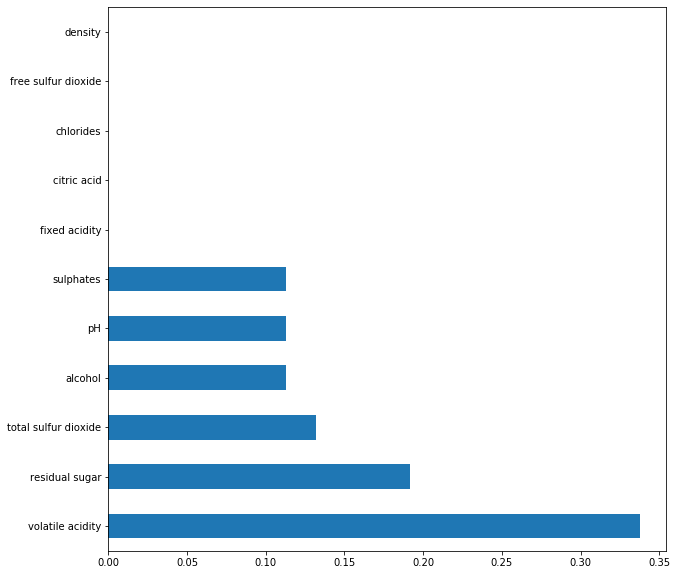

In [111]:
#Model 1: Decision trees
add_importances = pd.Series(model_1.feature_importances_, index= X_features.columns)
add_importances.nlargest(25).plot(kind= "barh", figsize=(10,10))

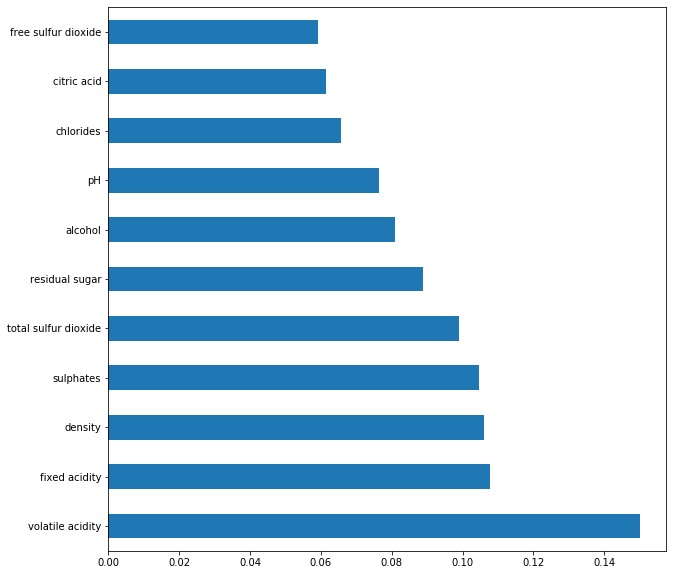

In [112]:
#Model 2:  GradientBoosting
add_importances1 = pd.Series(model_2.feature_importances_, index= X_features.columns)

add_importances1.nlargest(25).plot(kind= "barh", figsize=(10,10))

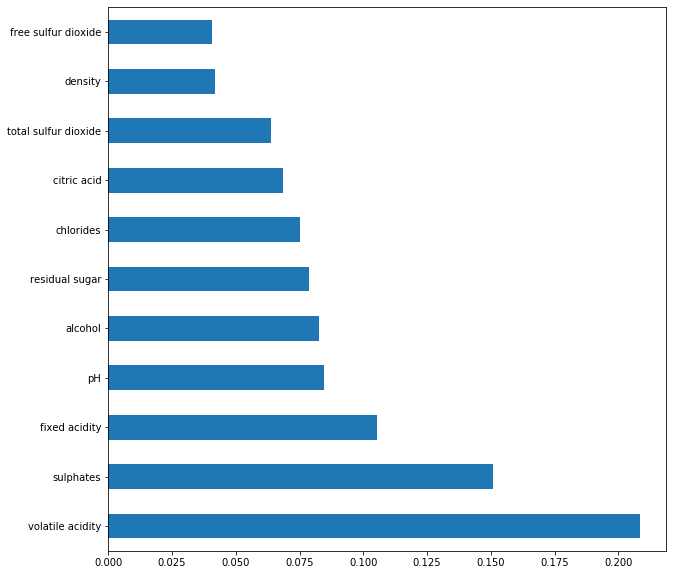

In [113]:
#Model 3:  RandomForest
add_importances2 = pd.Series(model_3.feature_importances_, index= X_features.columns)

add_importances2.nlargest(25).plot(kind= "barh", figsize=(10,10))

# Comparing the three models

In [114]:
#Fselecting data for only the good quality wine
df_temp= data[data["good_quality"]==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.0
mean,8.338021,0.519766,0.274967,2.532813,0.087128,16.031250,46.960938,0.996749,3.308118,0.660853,10.431478,5.709635,1.0
std,1.742808,0.171017,0.193294,1.395909,0.045554,10.486054,33.048411,0.001896,0.152798,0.166414,1.070688,0.732003,0.0
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,5.000000,1.0
25%,7.100000,0.390000,0.100000,1.900000,0.070000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.0
50%,7.900000,0.510000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996755,3.310000,0.620000,10.200000,6.000000,1.0
75%,9.300000,0.630000,0.430000,2.600000,0.090000,22.000000,63.000000,0.997853,3.400000,0.730000,11.100000,6.000000,1.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000,8.000000,1.0


In [115]:
#selecting data for only the bad quality wine
df_temp2 = data[data["good_quality"]==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270,0.0
std,1.649284,0.247970,0.207406,1.723735,0.075121,9.076508,26.395123,0.001667,0.175100,0.224323,0.918178,0.368359,0.0
min,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,8.400000,3.000000,0.0
25%,6.800000,0.565000,0.020000,1.900000,0.068500,5.000000,13.500000,0.995655,3.300000,0.495000,9.600000,4.000000,0.0
50%,7.500000,0.680000,0.080000,2.100000,0.080000,9.000000,26.000000,0.996600,3.380000,0.560000,10.000000,4.000000,0.0
75%,8.400000,0.882500,0.270000,2.950000,0.094500,15.500000,48.000000,0.997700,3.500000,0.600000,11.000000,4.000000,0.0
max,12.500000,1.580000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000,4.000000,0.0


By looking into the details, we can see that good quality wines:
Have higher levels of fixed acidity on average
Have lesser levels of volatile acidity on average
Have lesser residual sugar on average
Have lesser levels of chloride on average
